In [7]:
from agent.dna.gene import Gene
import yaml

config = yaml.load(open(r'H:\Documents\projets\LifeSim\configs\config_agent.yaml', 'r'), Loader=yaml.SafeLoader)

In [8]:
gene = Gene.from_config(config['dna']['genes']['morphology_gene'])
gene.compute_attributes()

In [10]:
gene_values = [1, 0.5, 2, 5] 

for v in gene_values: 
    gene.value = v 
    gene.compute_attributes() 
    print(f'Gene value: {v}') 
    for attr_k, attr_v in gene.attributes.items(): 
        print(f' {attr_k} : {attr_v}')

Gene value: 1
 size : 3.0
 speed : 0.5
 lifespan : 4000.0
 max_energy : 1
Gene value: 0.5
 size : 2.121320343559643
 speed : 1.0
 lifespan : 2828.42712474619
 max_energy : 0.5
Gene value: 2
 size : 4.242640687119286
 speed : 0.25
 lifespan : 5656.85424949238
 max_energy : 2
Gene value: 5
 size : 6.708203932499369
 speed : 0.1
 lifespan : 8944.27190999916
 max_energy : 5


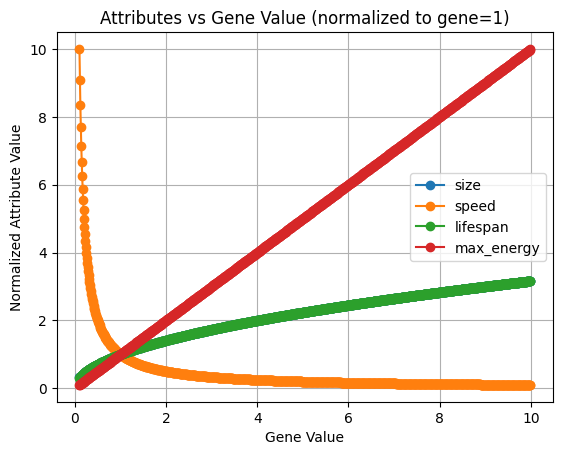

In [9]:
import matplotlib.pyplot as plt
import numpy as np

gene_values = np.arange(0.1, 10, 0.01)

# First: compute baseline attributes at gene value = 1
gene.value = 1
gene.compute_attributes()
baseline = gene.attributes.copy()

# Collect normalized values for each attribute
normalized = {k: [] for k in baseline.keys()}

for v in gene_values:
    gene.value = v
    gene.compute_attributes()
    for attr_k, attr_v in gene.attributes.items():
        # normalize relative to baseline (baseline[attr_k] corresponds to gene value 1)
        normalized[attr_k].append(attr_v / baseline[attr_k])

# Plot
for attr_k, attr_list in normalized.items():
    plt.plot(gene_values, attr_list, marker="o", label=attr_k)

plt.xlabel("Gene Value")
plt.ylabel("Normalized Attribute Value")
plt.title("Attributes vs Gene Value (normalized to gene=1)")
plt.legend()
plt.grid(True)
plt.show()
